# MyWebshop

You just became the new IT Operations Manager of the MyWebshop Company. Unfortunately, MyWebshop has some stability issues as of late. You hypothesise that part of the stability issues are caused by capacity constraints. You petition the CIO to introduce a clear Capacity Management process to validate this hypothesis. The CIO agrees and arranges priority and budget. The architect provides you with the solution architecture (shown below) and your engineers already identified the key usage, utilisation and consumption metrics that drive the IT solution. All the data you need is provided in the csv files and the assignment guide is found below (with the actions marked with bullet points). Good luck!

<img src="../Architecture.png",width=350,height=350> 

The dataset contains the following metrics per server type:
<img src="../Metrics.png",width=250,height=250> 

Do all the following exercises for all server types: web, app and DB.

___________________________________________________________________________________________________________


### Get the data

The first thing to do is get the csv file and put it into a format that is most handy to do statistics on. We suggest converting the csv table into a dataframe.
But before that, we need some libraries. Handling datasets in Python is best done with the "pandas" library. You can convert the csv file into a dataframe using Pandas. 
* Import the pandas library.
* Find and run the function within pandas to convert your csv into a dataframe.

In [2]:
import pandas as pd

In [3]:
# pandas.read_csv: Read CSV (comma-separated) file into DataFrame
df = pd.read_csv("../app_server.csv")

The next thing to do is checking the data to make sure if it is really a data frame, and what it contains. After that, it is always a good idea to plot the dataset, as human beings are visual creatures. We understand the problem better if we can visualize it. It's always good to start simple, like this:

* Print on the screen a sample of the dataset you have. (Say, print 5 rows of the dataset and see if it is correctly imported.)
* How many rows do you have?
* Do your columns have names? 

In [4]:
print(df.head(5))
print("\nNumber of Instances = " + str(len(df)))

              DT    VPH    TPH   CPU   MEM    IO
0  1/1/2014 0:00  49299  17579  18.1  46.6  12.9
1  1/1/2014 1:00  28372   9092  16.6  37.9  14.1
2  1/1/2014 2:00   6528   2051  11.5  40.1  11.4
3  1/1/2014 3:00   1291    463  13.7  45.6  11.9
4  1/1/2014 4:00   4709   1588  18.8  45.0  15.1

Number of Instances = 8760


### Formats, formats, formats...

* Check the type of the columns to see if certain columns need conversions.

With any programming language, dates and times should be handled with care. Python is no exception. There is a special library in Python to handle "datetime" type of data. 
* Find the appropriate library and import it.
* Make sure to convert the relevant columns into the datetime type. You might want to give it a specific format as well.
* Always check if your converted data is in the right format!


In [33]:
print(df['DT'].dtype)
print(df['CPU'].dtype)

datetime64[ns]
float64


In [5]:
import datetime

In [32]:
df['DT'] = pd.to_datetime(df['DT'], format="%m/%d/%Y %H:%M")
print(df['DT'].dtype)

datetime64[ns]


### Visualize your data

It is time to visualize our dataset. Look at the sample data you just printed on your screen. What makes sense to you? 

We have a time series dataset, that is a series of data points taken at successive equally spaced points in time. In our case, we have hourly data. I would suggest visualizing every metric as a function of time to see what the whole time series looks like per metric. We can then try to think of more clever ways to visualize the data.
* Plot every metric as  a function of time. Use scatter plotting for a more clear visualization rather than a line plot.
* Which library do you need for a scatter plot?

In [31]:
%matplotlib inline 
#  With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook,
#directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

import matplotlib.pyplot as plt

There is a bunch of problems when making a plot with scatter when you have datetime formats. It looks like scatter takes only numeric values in its x axis. Please see the following conversation in stackoverflow:
    
    https://stackoverflow.com/questions/27472548/pandas-scatter-plotting-datetime/29737663
    
We used the following trick:

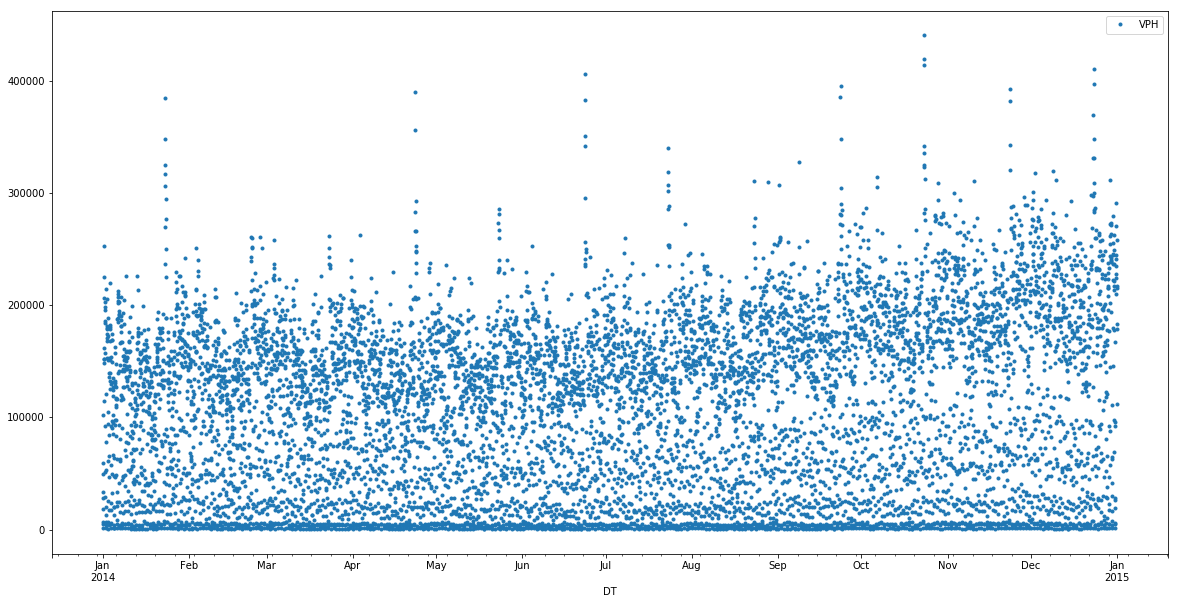

In [30]:
df.plot(x='DT', y='VPH', style=".",figsize=(20, 10))

Another one can be:

datetime64[ns]


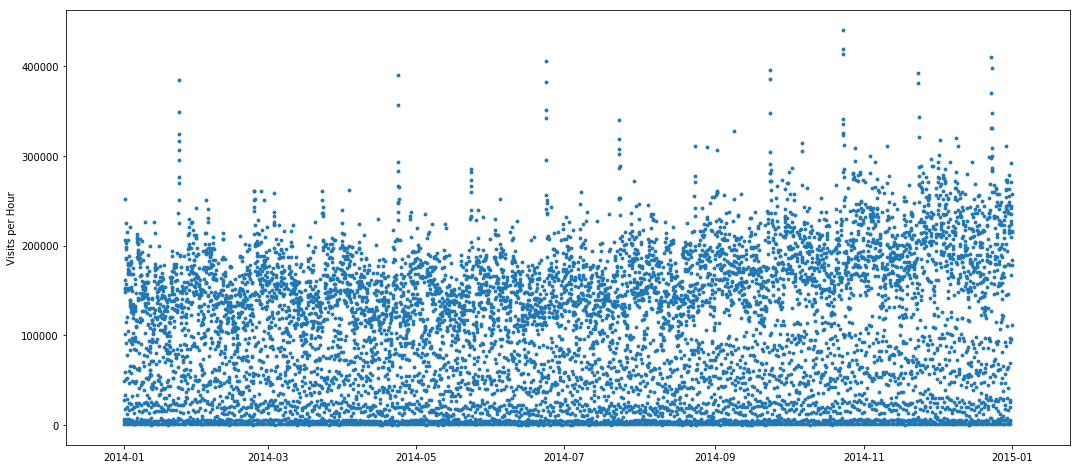

In [29]:
datetime = df['DT']
datetime = datetime.values.reshape(len(datetime), 1)
print(datetime.dtype)
vph = df['VPH']
vph = vph.values.reshape(len(vph), 1)
plt.figure(figsize=(18, 8))
plt.ylabel('Visits per Hour')
plt.scatter(datetime, vph, s=8)

What do you observe from your scatter data? What do you think is a better way to visualize it so that you can discover more? Do you also see the peaks almost regularly every month? What is that about?

I always add calendar features to time series data to see if there is any seasonality - different behavior based on day of the week, day of the month, hour of the day, etc. Let's try to discover such patterns.

* Add hour of the day, day of the week and day of the month features into your dataset. They will be new columns in your dataframe. Per row, you will want to get values for these columns.

In [28]:
df['DT'] = pd.to_datetime(df['DT'])
df['DoW'] = df['DT'].dt.weekday_name
df['DoM'] = df['DT'].dt.day
df['H'] = df['DT'].dt.hour
df['MoY'] = df['DT'].dt.strftime('%b')
print(df.head(5))

                   DT    VPH    TPH   CPU   MEM    IO        DoW  DoM  H  MoY
0 2014-01-01 00:00:00  49299  17579  18.1  46.6  12.9  Wednesday    1  0  Jan
1 2014-01-01 01:00:00  28372   9092  16.6  37.9  14.1  Wednesday    1  1  Jan
2 2014-01-01 02:00:00   6528   2051  11.5  40.1  11.4  Wednesday    1  2  Jan
3 2014-01-01 03:00:00   1291    463  13.7  45.6  11.9  Wednesday    1  3  Jan
4 2014-01-01 04:00:00   4709   1588  18.8  45.0  15.1  Wednesday    1  4  Jan


In [27]:
import numpy as np

In [34]:
# For ordering purposes in the plots

DayofWeek = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
DayofMonth = np.array(range(1, 32))
print(DayofMonth)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


<Figure size 1080x720 with 0 Axes>

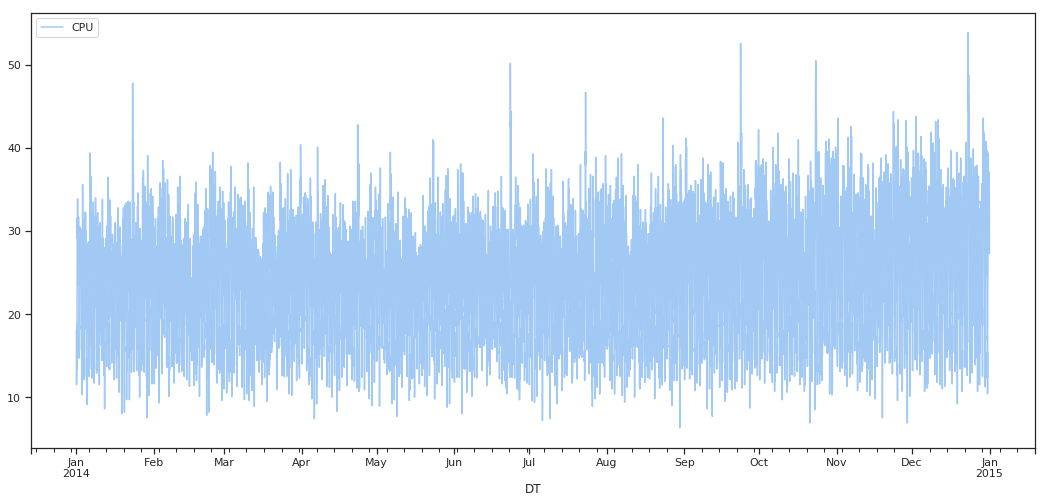

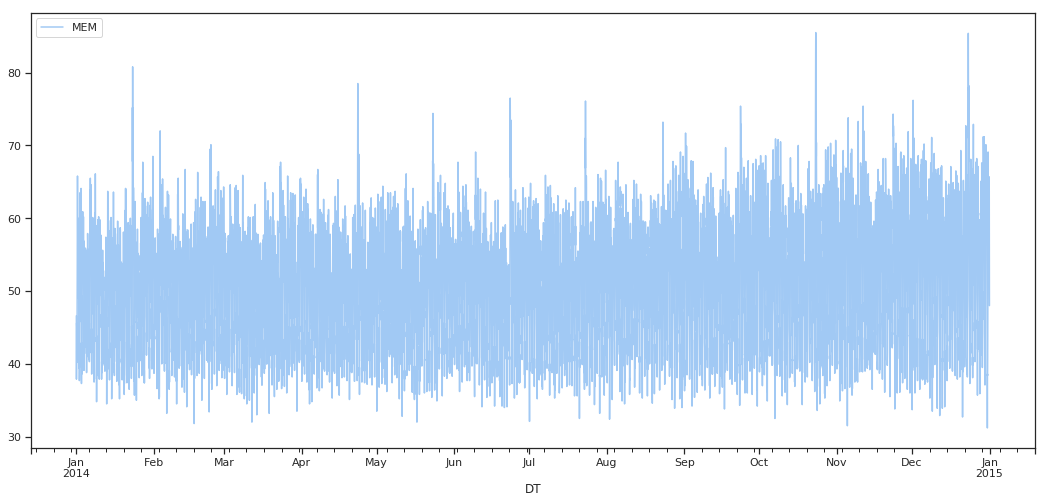

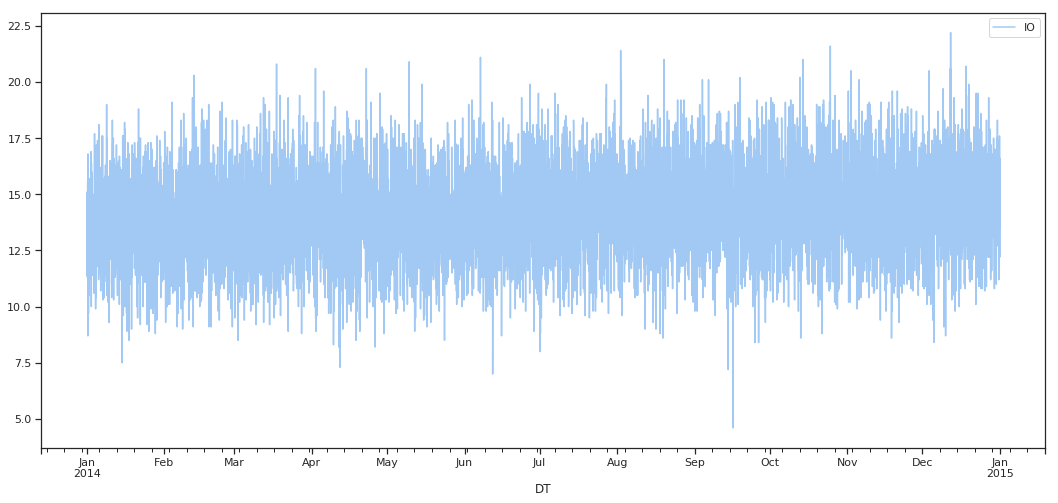

<Figure size 1080x720 with 0 Axes>

In [19]:
# Plot utilization 

CPUplot = df.plot(x='DT', y='CPU')
MEMplot = df.plot(x='DT', y='MEM')
IOplot = df.plot(x='DT', y='IO')
plt.figure(figsize=(15,10))

In [93]:
df_heat = pd.pivot_table(data = df, index='MoY', values='VPH', columns='DoW')
ix = pd.Categorical(df_heat.index, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
cols = pd.Categorical(df_heat.columns, ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ix = ix.sort_values(ascending=False)
cols = cols.sort_values(ascending=True)
df_heat = df_heat.loc[ix, cols]
print(df_heat)

DoW         Monday        Tuesday      Wednesday       Thursday  \
MoY                                                               
Dec  155690.125000  157563.225000  142637.091667  139625.218750   
Nov  144787.593750  136327.916667  136064.687500  138580.593750   
Oct  136788.531250  126887.031250  128962.291667  147969.325000   
Sep  134680.183333  137010.425000  121394.697917  119468.250000   
Aug  117005.031250  110024.781250  115534.260417  112141.020833   
Jul  113309.302083  107668.483333  118463.566667  106011.491667   
Jun  126063.133333  101096.229167  101874.260417  100837.416667   
May  106289.625000   97455.864583  101077.520833  102824.925000   
Apr  109163.635417  101031.016667  115445.116667  101453.395833   
Mar  117476.941667  103209.031250  102584.635417  104648.468750   
Feb  117594.760417  104432.187500  102728.656250  107101.239583   
Jan  116485.802083  106176.250000  109361.950000  122326.683333   

DoW         Friday       Saturday         Sunday  
MoY       

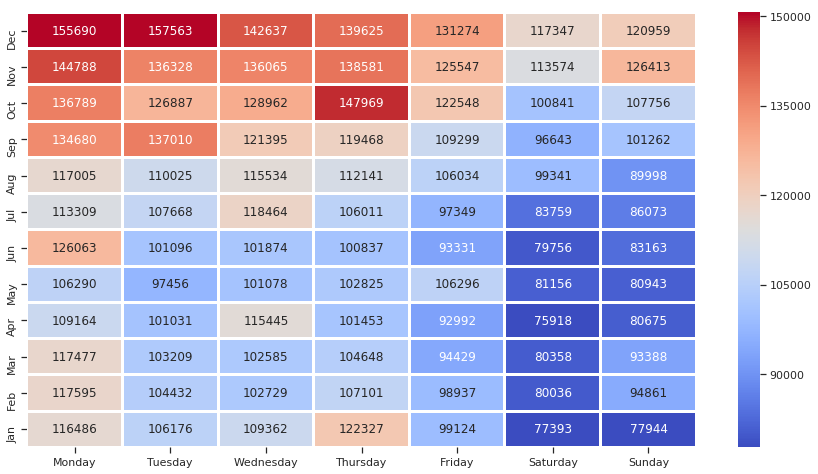

In [92]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df_heat, cmap='coolwarm', robust=True, annot=True, fmt=".0f", annot_kws={'size':12}, linewidths=2)
plt.xlabel("")
_ =plt.ylabel("")

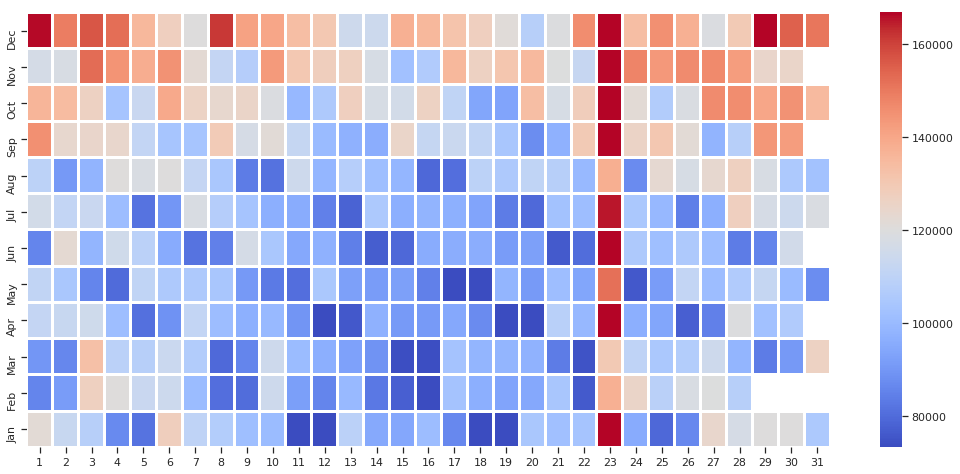

In [105]:
df_heat_year = pd.pivot_table(data = df, index='MoY', values='VPH', columns='DoM')
ix = pd.Categorical(df_heat_year.index, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ix = ix.sort_values(ascending=False)
df_heat_year = df_heat_year.loc[ix]
sns.heatmap(df_heat_year, cmap='coolwarm', robust=True, linewidths=2)
plt.xlabel("")
_ =plt.ylabel("")

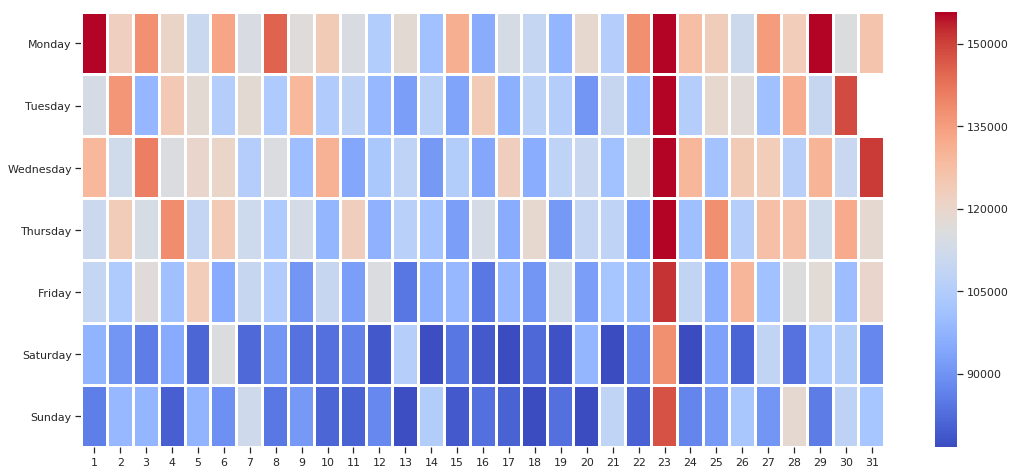

In [104]:
df_heat_days = pd.pivot_table(data = df, index='DoW', values='VPH', columns='DoM')
ix = pd.Categorical(df_heat_days.index, ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ix = ix.sort_values(ascending=True)
df_heat_days = df_heat_days.loc[ix]
sns.heatmap(df_heat_days, cmap='coolwarm', robust=True, linewidths=2)
plt.xlabel("")
_ =plt.ylabel("")

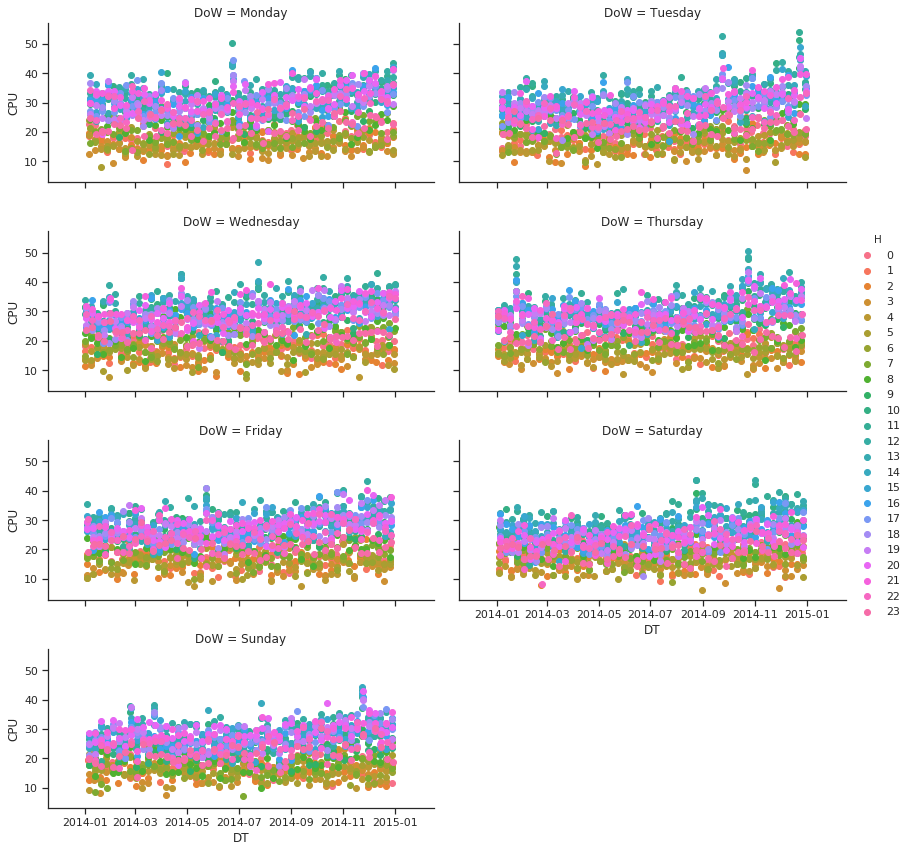

In [73]:
import seaborn as sns
# Grid scatter plot per Week day colored by hours

fg = sns.FacetGrid(data=df, col= 'DoW', col_order=DayofWeek,col_wrap=2,  hue='H', aspect=2)
fg.map(plt.scatter, 'DT', 'CPU').add_legend()

We are almost ready to make good plots to understand more about what is going on in our dataset. 
* One more step to take: find and import the statistical data visualization library for better graphs. 
* While you are at it, I suggest you read a bit about boxplot graphs and see how useful they can be in understanding the distribution of your data. 

In [38]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [18, 8]
plt.style.use('ggplot')

Why don't we start by plotting average values of each of our utilization metrics (CPU, MEM, IO)? We saw that there are structural peaks in utilization every month or so. Is there a pattern? Let's draw average values per day of the month, and day of the week. It should look something like this:



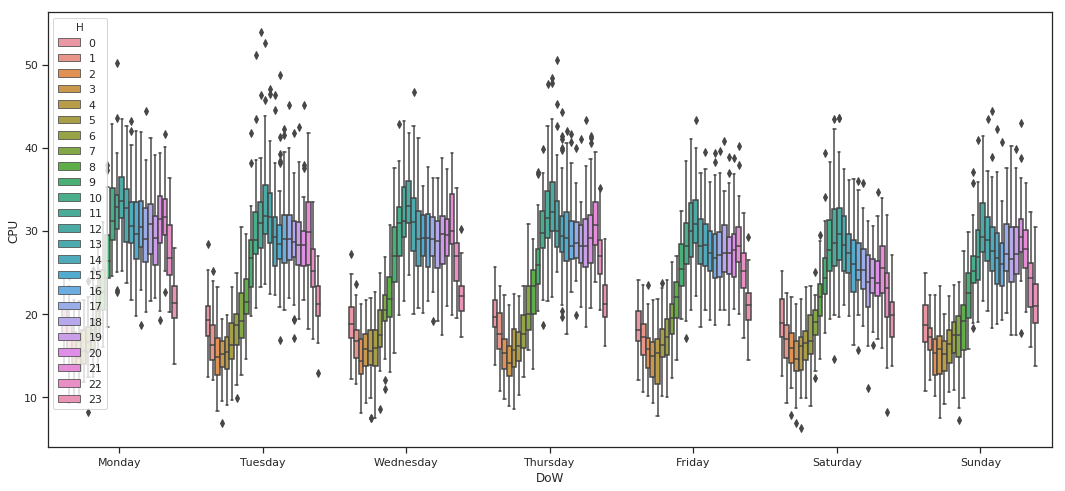

In [39]:
# Draw a nested boxplot to show the pattern for utilization in terms of weekday and hours

sns.set(style="ticks", palette="pastel")
p1= sns.boxplot(x="DoW", y="CPU",
            hue="H",order=DayofWeek,
            data=df)


Text(0, 0.5, 'Average CPU %')

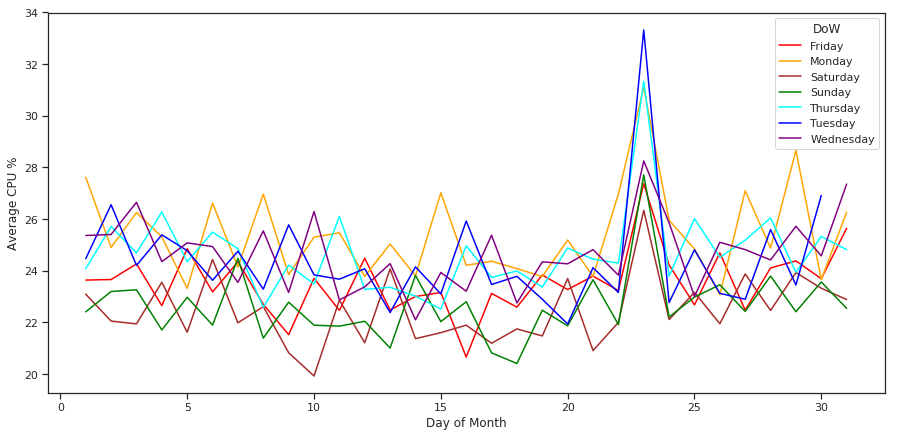

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_prop_cycle(color=["red","orange","brown","green","cyan","blue","purple"])
df.groupby(['DoM','DoW']).mean()['CPU'].unstack().plot(ax=ax)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Average CPU %")


#p2 = sns.boxplot(x="DoM", y="CPU",
#            hue="DoW",
#            data=df)

#### Bonus question: 
How do you change the order of the legend in the graph above so that it shows the week days from Monday to Sunday?
(Email your answer / notebook to: pinar.kahraman@ing.com)

### Our Goal
Gain insight in resources that have caused or could cause incidents due to capacity constraints
and setup utilisation monitoring.

For each component:
1. Plot utilisation versus time. Use scatter plot.
2. Thresholds for normal operation are set at 85%. Plot the threshold.
3. Identify key utilisation type.

Looking at the three scatterplots, do you see critical resources that could have caused stability
issues and what do you advise?


In [ ]:

from sklearn import linear_model
import statsmodels.api as sm

In [21]:
cpu = app_df['CPU']
cpu = cpu.values.reshape(len(cpu), 1)
target = app_df['VPH']
target = target.values.reshape(len(target), 1)
cpu_train  = cpu[:-4380]
cpu_test = cpu[-4380:]
target_train = target[:-4380]
target_test = target[-4380:]

In [8]:
mem = app_df['MEM']
mem = mem.values.reshape(len(cpu), 1)
mem_train  = mem[:-4380]
mem_test = mem[-4380:]

In [9]:
regr_cpu = linear_model.LinearRegression()
regr_mem = linear_model.LinearRegression()

In [10]:
lm_cpu = regr_cpu.fit(cpu_train, target_train)
lm_mem = regr_mem.fit(mem_train, target_train)

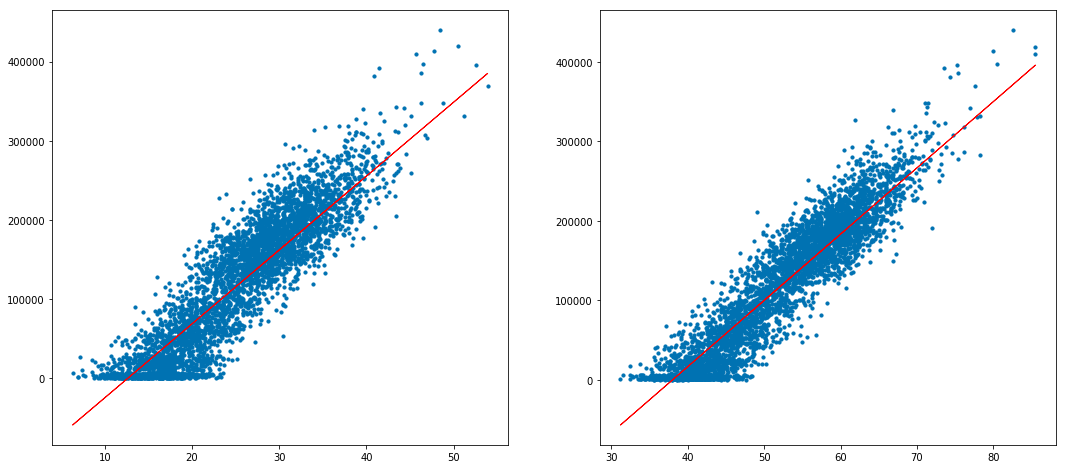

In [22]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(cpu_test, target_test, s = 10)
ax[0].plot(cpu_test, lm_cpu.predict(cpu_test), color='red', linewidth=1)
ax[1].scatter(mem_test, target_test, s = 10)
ax[1].plot(mem_test, lm_mem.predict(mem_test), color='red', linewidth=1)

In [13]:
model_cpu = sm.OLS(target, cpu).fit()
predictions_cpu = model_cpu.predict(cpu)
model_cpu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 5.687e+04
Date:                Sun, 20 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:22:58   Log-Likelihood:            -1.0702e+05
No. Observations:                8760   AIC:                         2.140e+05
Df Residuals:                    8759   BIC:                         2.141e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4958.6508     20.793    238.477      0.000    4917.892    4999.410
==============================================================================
Omnibus:                      234.101   Durbin-Watson:                   0.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.893
Skew:                           0.224   Prob(JB):                     4.25e-36
Kurtosis:                       2.505   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model_mem = sm.OLS(target, mem).fit()
predictions_mem = model_mem.predict(mem)
model_mem.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                 3.475e+04
Date:                Sun, 20 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:23:05   Log-Likelihood:            -1.0882e+05
No. Observations:                8760   AIC:                         2.176e+05
Df Residuals:                    8759   BIC:                         2.177e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2316.9718     12.428    186.424      0.000    2292.609    2341.335
==============================================================================
Omnibus:                      391.606   Durbin-Watson:                   0.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.309
Skew:                           0.227   Prob(JB):                     6.49e-48
Kurtosis:                       2.376   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""